# CNN
## Question 1 - kernels


### a. For each kernel in the following list please list it’s 3x3 matrix and what does it suppose to find:

##### source links:
https://en.wikipedia.org/wiki/Kernel_(image_processing)
<br>http://www.andreageremia.it/tutorial_matrix.html
<br>https://towardsdatascience.com/convolutional-neural-networks-357b9b2d75bd
<br>https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411
### ○ smooth



Or a box blur (also known as a box linear filter) is a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image. It is a form of low-pass ("blurring") filter. A 3 by 3 box blur ("radius 1") can be written as matrix:

$$
\begin{vmatrix}
1& 1& 1\\
1& 1& 1\\
1& 1& 1
\end{vmatrix}
$$


### ○ Identity

An Identity Kernel when applied to an image through convolution, will have no effect on the resulting image. Every pixel will retain its original value 

$$
\begin{vmatrix}
0& 0& 0\\
0& 1& 0\\
0& 0& 0
\end{vmatrix}
$$

### ○ edge
Edge detection includes a variety of mathematical methods that aim at identifying points in a digital image at which the image brightness changes sharply or, more formally, has discontinuities. The points at which image brightness changes sharply are typically organized into a set of curved line segments termed edges.  Edge detection is a fundamental tool in image processing, machine vision and computer vision, particularly in the areas of feature detection and feature extraction

$$
\begin{vmatrix}
-1& -1& -1\\
-1& 8& -1\\
-1& -1& -1
\end{vmatrix}
$$

### ○ sharpen
The sharpen kernel emphasizes differences in adjacent pixel values. This makes the image look more vivid

Sharpening enhances the definition of edges in an image. Whether your images come from a digital camera or a scanner, most images can benefit from sharpening. The degree of sharpening needed varies depending on the quality of the digital camera or scanner. Keep in mind that sharpening cannot correct a severely blurred image.

$$
\begin{vmatrix}
0& -1& 0\\
-1& 5& -1\\
0& -1& 0
\end{vmatrix}
$$

### ○ emboss

The emboss kernel (similar to the sobel kernel and sometimes referred to mean the same) givens the illusion of depth by emphasizing the differences of pixels in a given direction. In this case, in a direction along a line from the top left to the bottom right.

Image embossing is a computer graphics technique in which each pixel of an image is replaced either by a highlight or a shadow, depending on light/dark boundaries on the original image. Low contrast areas are replaced by a gray background. The filtered image will represent the rate of color change at each location of the original image. Applying an embossing filter to an image often results in an image resembling a paper or metal embossing of the original image, hence the name

$$
\begin{vmatrix}
-2& -1& 0\\
-1& 1& 1\\
0& 1& 2
\end{vmatrix}
$$

### b. What does filter normalization mean? 


Normalization is defined as the division of each element in the kernel by the sum of all kernel elements, so that the sum of the elements of a normalized kernel is unity. This will ensure the average pixel in the modified image is as bright as the average pixel in the original image.


The example:


$$
\frac{1}{9}\begin{vmatrix}
1& 1& 1\\
1& 1& 1\\
1& 1& 1
\end{vmatrix}
$$
Box blur
(normalized)



### Why is it important?

The reason why is because by doing this, we are ensuring that the output value at each pixel never goes beyond the dynamic range of the data type. 

By normalizing the kernel, we are ensuring that all of the coefficients are weighted between [0,1] and the total sum of the kernel is 1. 

By doing this, we are ensuring that we never have to check the output and clip the value when necessary. 

This also ensures that we don't need to divide by the sum of the weights in our convolution code at every pixel because that normalization has already been taken care of by the kernel normalization step. 

We only have to normalize once. 

However, it's a tricky business when we have negative coefficients in the kernel. If there are negative coefficients, then normalization is seldom done

## Question 2 - LeNet
#### In this question you’ll need to create a CNN called LeNet that will be trained to classify CIFAR-10 dataset. Please use Keras in your implementation. Please submit your code along with the output of the model.fit process.
#### Hint: use this as a basis for your modeling:
https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/
<br>https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
<br>https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import np_utils
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras import backend as K
from tensorflow.keras import datasets
import tensorflow as tf
tf.keras.backend.clear_session()  # For easy reset of notebook state.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
class LeNet:
   
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses,
              activation="relu", weightsPath=None):
        
       # initialize the model
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)
        
        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (numChannels, imgRows, imgCols)
            
         # define the first set of CONV => ACTIVATION => POOL layers
        model.add(Conv2D(20, 5, padding="same",
                         input_shape=inputShape))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))   
        
        # define the second set of CONV => ACTIVATION => POOL layers
        model.add(Conv2D(50, 5, padding="same"))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # define the first FC => ACTIVATION layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation(activation))
        
        # define the second FC layer
        model.add(Dense(numClasses))
        
        # lastly, define the soft-max classifier
        model.add(Activation("softmax"))
        
        # if a weights path is supplied (inicating that the model was
        # pre-trained), then load the weights
        if weightsPath is not None:
            model.load_weights(weightsPath)
            
        # return the constructed network architecture
        return model

Load the data


In [3]:
data = tf.keras.datasets.cifar10
(train_images, train_labels),(test_images,test_labels) =  data.load_data()


Shape check

In [4]:
train_images.shape,train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    train_images = train_images.reshape((train_images.shape[0], 3, 32, 32))
    test_images = test_images.reshape((test_images.shape[0], 3, 32, 32))
    
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
    test_images = test_images.reshape((test_images.shape[0], 32, 32, 3))
    
# scale data to the range of [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

Plot some images from train dataset 


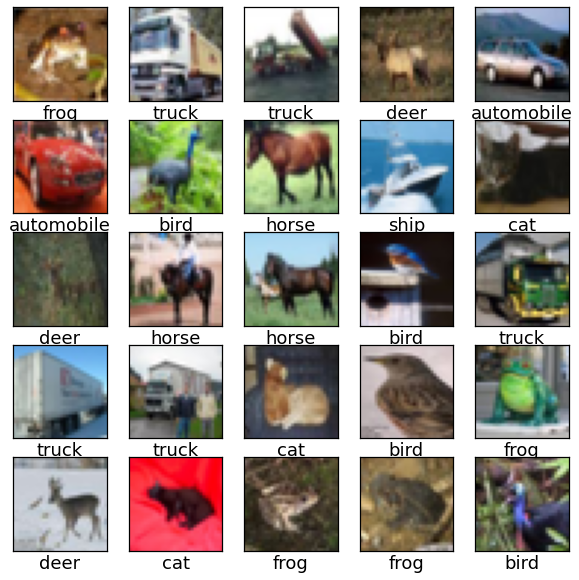

In [7]:
class_names = ['airplane','automobile','bird','cat','deer','dog',
               'frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]]);

In [8]:
# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in our case , there are 10 class labels
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)

# initialize the optimizer and model
model = LeNet.build(numChannels=3, 
                    imgRows=32, 
                    imgCols=32,
                    numClasses=10)

model.compile(loss="categorical_crossentropy", 
              optimizer=SGD(lr=0.01),
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [9]:
history = model.fit(train_images, 
          train_labels_cat, 
          batch_size=128, 
          epochs=100,
          validation_data=(test_images,test_labels_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 194s 4ms/step - loss: 2.1412 - accuracy: 0.2238 - val_loss: 1.9540 - val_accuracy: 0.3088
Epoch 2/100
50000/50000 [==============================] - 189s 4ms/step - loss: 1.8626 - accuracy: 0.3441 - val_loss: 1.7778 - val_accuracy: 0.3718
Epoch 3/100
50000/50000 [==============================] - 212s 4ms/step - loss: 1.7132 - accuracy: 0.3937 - val_loss: 1.6976 - val_accuracy: 0.4067
Epoch 4/100
50000/50000 [==============================] - 262s 5ms/step - loss: 1.5999 - accuracy: 0.4314 - val_loss: 1.5535 - val_accuracy: 0.4380
Epoch 5/100
50000/50000 [==============================] - 295s 6ms/step - loss: 1.5182 - accuracy: 0.4610 - val_loss: 1.5108 - val_accuracy: 0.4609
Epoch 6/100
50000/50000 [==============================] - 256s 5ms/step - loss: 1.4593 - accuracy: 0.4844 - val_loss: 1.4330 - val_accuracy: 0.4888
Epoch 7/100
50000/50000 [==============================]

In [10]:
prediction = model.predict(test_images)
pred_res = prediction.argmax(axis=1)
pred_res

array([5, 1, 0, ..., 5, 1, 7])

In [15]:
print(classification_report(test_labels, pred_res,\
                            target_names = class_names))

              precision    recall  f1-score   support

    airplane       0.73      0.75      0.74      1000
  automobile       0.80      0.77      0.78      1000
        bird       0.59      0.60      0.59      1000
         cat       0.49      0.52      0.50      1000
        deer       0.65      0.61      0.63      1000
         dog       0.61      0.56      0.58      1000
        frog       0.71      0.77      0.74      1000
       horse       0.76      0.73      0.74      1000
        ship       0.79      0.80      0.80      1000
       truck       0.73      0.73      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_cat, verbose=2)
test_loss, test_acc 

(1.836236922454834, 0.6840000152587891)

In [13]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

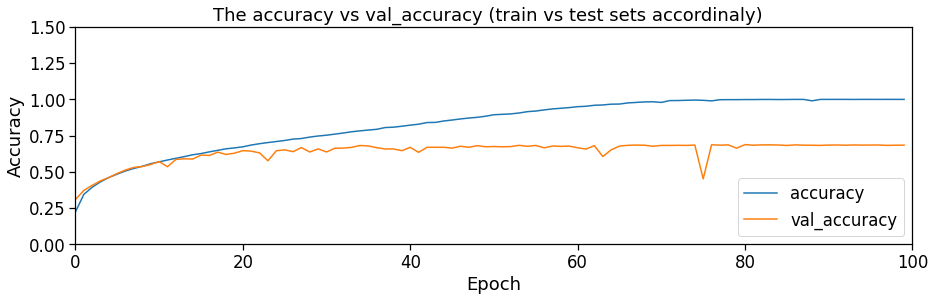

In [25]:
#plot the accuracy 
plt.figure(figsize=(15,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.5])
plt.xlim([0, 100])
plt.title('The accuracy vs val_accuracy (train vs test sets accordinaly)  ')
plt.legend(loc='lower right');

As we can see from the plot above, 20 epoch could be enough for our model. With bigger amount we get too big difference between the accuracy results for train and validation sets

And here the confirming plot for loss function


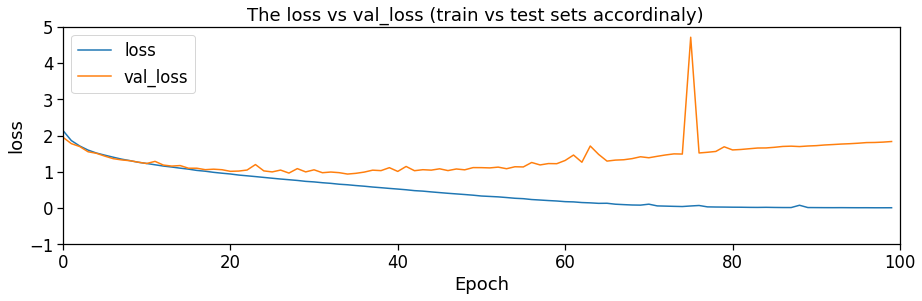

In [35]:
#plot the loss 
plt.figure(figsize=(15,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([-1, 5])
plt.xlim([0, 100])
plt.title('The loss vs val_loss (train vs test sets accordinaly)  ')
plt.legend(loc='upper left');